# 2 Data wrangling<a id='2_Data_wrangling'></a>

## 2.1 Contents<a id='2.1_Contents'></a>
* [2 Data wrangling](#2_Data_wrangling)
  * [2.1 Contents](#2.1_Contents)
  * [2.2 Introduction](#2.2_Introduction)
  * [2.3 Imports](#2.3_Imports)
  * [2.4 Objectives](#2.4_Objectives)
  * [2.5 Load The Spotify User Playlist Data](#2.5_Load_The_Spotify_User_Playlist_Data)
  * [2.6 Explore The Data](#2.6_Explore_The_Data)
    * [2.6.1 Find A_Playlist Of Interest](#2.6.1_Find_A_Playlist_Of_Interest)
    * [2.6.2 Number Of Missing Values By Column](#2.6.2_Number_Of_Missing_Values_By_Column)
    * [2.6.3 Categorical Features](#2.6.3_Categorical_Features)
      * [2.6.3.1 Unique Playlist Names](#2.6.3.1_Unique_Playlist_Names)
      * [2.6.3.2 Unique Track Names](#2.6.3.2_Unique_Track_Names)
    * [2.6.4 Numeric Features](#2.6.4_Numeric_Features)
      * [2.6.4.1 Numeric data summary](#2.6.4.1_Numeric_data_summary)
      * [2.6.4.2 Distributions Of Feature Values](#2.6.4.2_Distributions_Of_Feature_Values)

## 2.2 Introduction<a id='2.2_Introduction'></a>

This data science project's goal is to create a music recommendation model for Spotify users. Spotify hopes to improve user experience by recommending tracks that are a good fit for each user via its music recommendation algorithm. The company receives many music playlists from its users and wishes to use the information to predict which songs will appear on the user's playlist. This project aims to build a recommendation model for music track based on playlist name, number of tracks in the playlist, number of playlist followers, number of edits, number of albums, song name, album name, artist name, and playlist duration. This model will be used to guide Spotify in improving their user music experience and interaction on the app.


## 2.3 Imports<a id='2.3_Imports'></a>

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob, collections


## 2.4 Objectives<a id='2.4_Objectives'></a>


* The data need for this music recommendation can be:
    * Songs information in each playlists
    * Playlist length and its follower
    
* There are no fundamental issue about this data. This tracks data is nested inside each playlist, so this dataset may need to reorganize.

## 2.5 Load The Spotify User Playlist Data<a id='2.5_Load_The_Spotify_User_Playlist_Data'></a>

### Loading data for 20,000 playlists from json files

In [2]:
read_files = glob.glob("spotify_million_playlist_dataset/data/*.json")
df = pd.DataFrame()

for f in read_files:
    with open(f, "rb") as infile:
        data = json.load(infile)
        each_json_file = pd.DataFrame(data['playlists'])
        df = df.append(each_json_file)

In [3]:
print("Number of playlists: " , len(df))

Number of playlists:  20000


In [4]:
# See a summary of the data
df.info

<bound method DataFrame.info of                 name collaborative    pid  modified_at  num_tracks  \
0             NewNew         false   7000   1509321600          83   
1           chilllll         false   7001   1506902400          18   
2           offline          false   7002   1505433600          63   
3              feels         false   7003   1508284800          97   
4        Latin Dance         false   7004   1489795200          23   
..               ...           ...    ...          ...         ...   
995      Punk Covers         false  12995   1505865600          35   
996              NYE         false  12996   1507766400          87   
997  Reception Music         false  12997   1506038400         110   
998        Sad Music         false  12998   1505520000          54   
999             Calm         false  12999   1444780800          14   

     num_albums  num_followers  \
0            78              2   
1            15              1   
2            48          

In [5]:
df.head(3)

,name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers,tracks,num_edits,duration_ms,num_artists,description
0,NewNew,false,7000,1509321600,83,78,2,"[{'pos': 0, 'artist_name': 'WILDES', 'track_ur...",49,18461552,72,NaN
1,chilllll,false,7001,1506902400,18,15,1,"[{'pos': 0, 'artist_name': 'Angus & Julia Ston...",8,4031475,10,NaN
2,offline,false,7002,1505433600,63,48,1,"[{'pos': 0, 'artist_name': 'Keith Urban', 'tra...",16,15021695,45,NaN


`pid` is the playlist identity number. `tracks` column has the songs information in the playlist. The other columns are potential features.

Since `tracks` includes so many infomation in one columns, each type of track information is needed to put in seperate column. I will flatten the track data, and added its playlists information in each row.

## 2.6 Explore The Data<a id='2.6_Explore_The_Data'></a>

### 2.6.1 Find A Playlist Of Interest<a id='2.6.1_Find_A_Playlist_Of_Interest'></a>

Let's take a look in one playlist called `chilllll` , with pid = 7001. Check it's data:

In [6]:
df[df.name == 'chilllll'].T

,1,930,727,829
name,chilllll,chilllll,chilllll,chilllll
collaborative,false,false,false,false
pid,7001,9930,11727,20829
modified_at,1506902400,1503705600,1469577600,1508976000
num_tracks,18,13,110,99
num_albums,15,12,104,71
num_followers,1,2,10,1
tracks,"[{'pos': 0, 'artist_name': 'Angus & Julia Ston...","[{'pos': 0, 'artist_name': 'SZA', 'track_uri':...","[{'pos': 0, 'artist_name': 'Twenty One Pilots'...","[{'pos': 0, 'artist_name': 'Miley Cyrus', 'tra..."
num_edits,8,11,64,13
duration_ms,4031475,3033444,25358214,21347880


There are four playlists that share the same name called `chilllll`. Let's use the playlist with pid of 7001, because pid is supposed to be unique between the playlist, and the data will only gives one result.

In [7]:
df[df.pid == 7001].T

,1
name,chilllll
collaborative,false
pid,7001
modified_at,1506902400
num_tracks,18
num_albums,15
num_followers,1
tracks,"[{'pos': 0, 'artist_name': 'Angus & Julia Ston..."
num_edits,8
duration_ms,4031475


### 2.6.2 Number Of Missing Values By Column<a id='2.6.2_Number_Of_Missing_Values_By_Column'></a>

In [8]:
df.isnull().sum()

name                 0
collaborative        0
pid                  0
modified_at          0
num_tracks           0
num_albums           0
num_followers        0
tracks               0
num_edits            0
duration_ms          0
num_artists          0
description      19629
dtype: int64

There are total of 20,000 playlists with a missing of 19,629 value on description column. I will get rid of that column since it has 98% of missing value.

In [9]:
df = df.drop(columns=['description'])

In [10]:
# Check columns name after drop the `description` columns
df.columns

Index(['name', 'collaborative', 'pid', 'modified_at', 'num_tracks',
       'num_albums', 'num_followers', 'tracks', 'num_edits', 'duration_ms',
       'num_artists'],
      dtype='object')

### 2.6.3 Categorical Features<a id='2.6.3_Categorical_Features'></a>

In [11]:
df.select_dtypes(object)

,name,collaborative,tracks
0,NewNew,false,"[{'pos': 0, 'artist_name': 'WILDES', 'track_ur..."
1,chilllll,false,"[{'pos': 0, 'artist_name': 'Angus & Julia Ston..."
2,offline,false,"[{'pos': 0, 'artist_name': 'Keith Urban', 'tra..."
3,feels,false,"[{'pos': 0, 'artist_name': 'Chance The Rapper'..."
4,Latin Dance,false,"[{'pos': 0, 'artist_name': 'Merengue Latin Ban..."
...,...,...,...
995,Punk Covers,false,"[{'pos': 0, 'artist_name': 'New Found Glory', ..."
996,NYE,false,"[{'pos': 0, 'artist_name': 'P!nk', 'track_uri'..."
997,Reception Music,false,"[{'pos': 0, 'artist_name': 'Vance Joy', 'track..."
998,Sad Music,false,"[{'pos': 0, 'artist_name': 'A Great Big World'..."


In the `collaborative` column, most of the value appears as 'false'. Let's check the total of 'false' and other value in that column.

In [12]:
# Count how many playlist has 'false' or `true` value in `collborative` column
df.collaborative.value_counts()

false    19570
true       430
Name: collaborative, dtype: int64

#### 2.6.3.1 Unique Playlist Names<a id='2.6.3.1_Unique_Playlist_Names'></a>

In [13]:
df['name'].value_counts().head(10)

Country      263
Chill        177
chill        163
country      154
Rock         104
Workout      101
Rap           99
Christmas     90
workout       72
Oldies        70
Name: name, dtype: int64

There are many duplicated playlist name. Let's check if there are any playlists have the same `pid`.

In [14]:
df['pid'].value_counts(ascending=False).head()

2047     1
693      1
19116    1
17069    1
10928    1
Name: pid, dtype: int64

Great, playlist pid are unique. So I will use this `pid` instead of playlist `name`.

#### 2.6.3.2 Unique Track Names<a id='2.6.3.2_Unique_Track_Names'></a>

## Tracks Flattening

In [15]:
track_dict = {}
album_dict = {}

for i in range(len(df)):
    row = df.iloc[i]
    playlist_id = row['pid']
    
    for track in row['tracks']:
        song_id = track['track_uri']
        song_name = track['track_name']
        
        album_id = track['album_uri']
        album_name = track['album_name']
        
        
        if song_id not in track_dict:
            track_dict[song_id] = {'name': song_name, 'playlist_vector': [], 'freq': 0}
            
            
        if album_id not in album_dict:
            album_dict[album_id] = {'name': album_name, 'freq': 0}

        track_dict[song_id]['freq'] += 1
        album_dict[album_id]['freq'] += 1
        track_dict[song_id]['playlist_vector'].append(playlist_id)

In [16]:
df_unique_tracks = pd.DataFrame.from_dict(track_dict, orient="index").reset_index()

In [17]:
df_unique_tracks.name.value_counts(ascending=False).head()

Silent Night       146
Home               136
Intro              110
White Christmas     96
O Holy Night        93
Name: name, dtype: int64

### 2.6.4 Numeric Features<a id='2.6.4_Numeric_Features'></a>


#### 2.6.4.1 Numeric data summary<a id='2.6.4.1_Numeric_data_summary'></a>

In [18]:
# of the playlists
df.columns.unique()

Index(['name', 'collaborative', 'pid', 'modified_at', 'num_tracks',
       'num_albums', 'num_followers', 'tracks', 'num_edits', 'duration_ms',
       'num_artists'],
      dtype='object')

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pid,20000.0,1.079950e+04,6.057654e+03,0.000000e+00,5.999750e+03,1.099950e+04,1.599925e+04,2.099900e+04
modified_at,20000.0,1.476559e+09,3.653277e+07,1.310602e+09,1.459123e+09,1.490573e+09,1.505606e+09,1.509494e+09
num_tracks,20000.0,6.659810e+01,5.377117e+01,5.000000e+00,2.600000e+01,5.000000e+01,9.200000e+01,2.500000e+02
num_albums,20000.0,4.974990e+01,4.003127e+01,2.000000e+00,2.000000e+01,3.700000e+01,6.800000e+01,2.330000e+02
num_followers,20000.0,2.788700e+00,1.163831e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.584200e+04
num_edits,20000.0,1.785130e+01,2.087196e+01,2.000000e+00,5.000000e+00,1.000000e+01,2.200000e+01,1.780000e+02
duration_ms,20000.0,1.562522e+07,1.286244e+07,5.710860e+05,6.064626e+06,1.151855e+07,2.143368e+07,9.818810e+07
num_artists,20000.0,3.821120e+01,3.041335e+01,3.000000e+00,1.600000e+01,3.000000e+01,5.200000e+01,1.990000e+02


#### 2.6.4.2 Distributions Of Feature Values<a id='2.6.4.2_Distributions_Of_Feature_Values'></a>

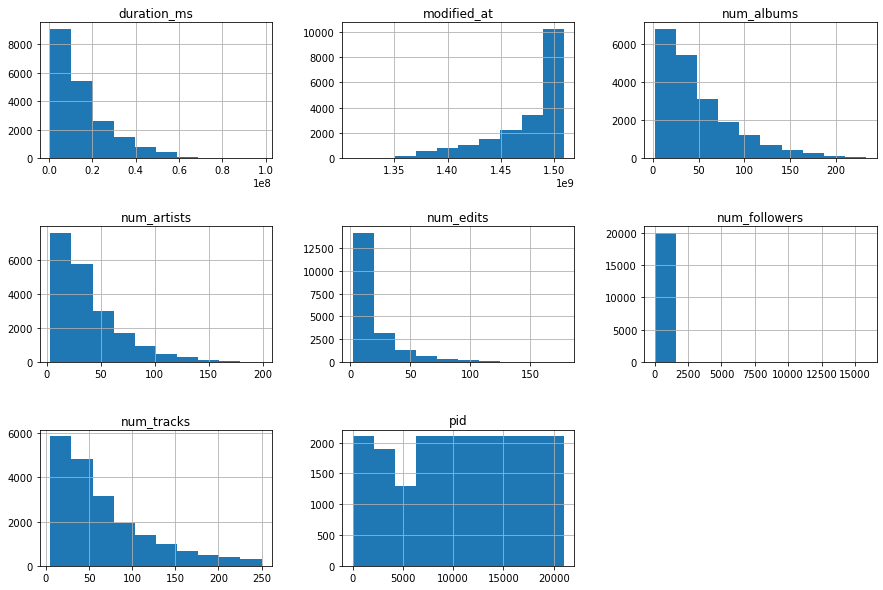

In [21]:
df.hist(figsize=(15,10))    # width, height in inches           
plt.subplots_adjust(hspace = 0.5);